In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR
from scipy import signal
import pandas as pd
import seaborn as sns
###
###Observable (fixed order)
###

h = 0.01
np.random.seed(10)

J=np.block([[np.zeros((5,5)),np.eye(5)],[-np.eye(5),np.zeros((5,5))]])
print(J)

Q = np.eye(10)
print(Q)

B=np.array([0,0,0,0,0,1,1,1,1,1])
print(B)

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [-1. -0. -0. -0. -0.  0.  0.  0.  0.  0.]
 [-0. -1. -0. -0. -0.  0.  0.  0.  0.  0.]
 [-0. -0. -1. -0. -0.  0.  0.  0.  0.  0.]
 [-0. -0. -0. -1. -0.  0.  0.  0.  0.  0.]
 [-0. -0. -0. -0. -1.  0.  0.  0.  0.  0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[0 0 0 0 0 1 1 1 1 1]


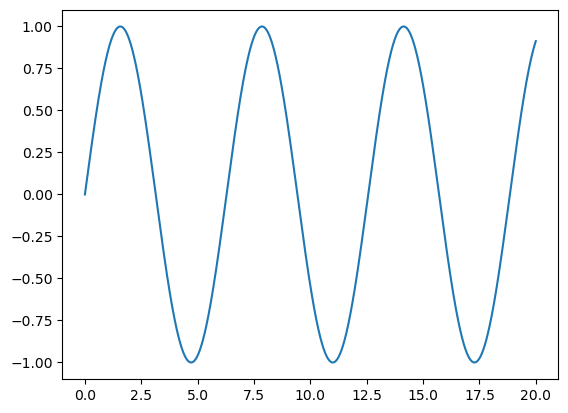

In [15]:
time = np.linspace(0,20,2000)
F = 1*np.sin(time)
plt.plot(time,F)

In [16]:
#check canonical (noncanonical)
det = np.zeros((10,10))
for i in range(10):
    det[i]=np.linalg.matrix_power(J@Q,i)@B
print(det)
print(np.linalg.det(det))

[[ 0.  0.  0.  0.  0.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]]
0.0


[ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597 -0.72008556
  0.26551159  0.10854853  0.00429143 -0.17460021]


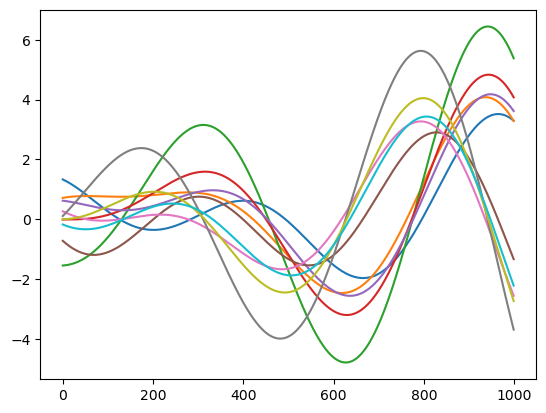

In [17]:
def Integrator(x,i):
  return x+h*(J@Q@x+B*F[i])
trajectory_data=np.random.normal(0,1,10)
print(trajectory_data)

trajectory = [trajectory_data]
for i in range(999):
  trajectory.append(Integrator(trajectory[-1],i))

plt.plot(trajectory)

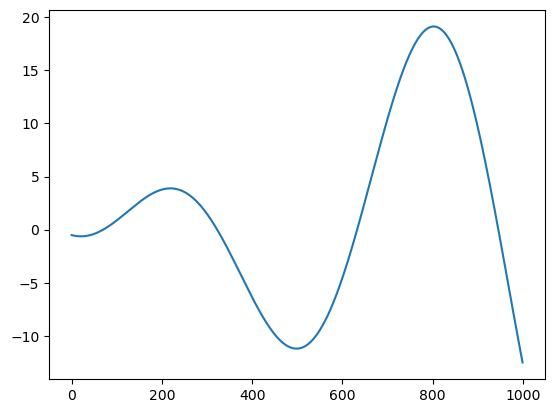

In [18]:
output = [(B.T)@Q@item for item in trajectory]

plt.plot(output)

data = torch.FloatTensor(np.array(output))

def Integrator2(x,i):
    
  d = torch.abs(t)  

  a0 = torch.square(d[0]*d[1]*d[2]*d[3]*d[4])
  a2 = a0*(torch.square(1/d[0])+torch.square(1/d[1])+torch.square(1/d[2])+torch.square(1/d[3])+torch.square(1/d[4]))
  a4 = a0*(torch.square(1/(d[0]*d[1]))+torch.square(1/(d[0]*d[2]))+torch.square(1/(d[0]*d[3]))+torch.square(1/(d[0]*d[4]))+torch.square(1/(d[1]*d[2]))+torch.square(1/(d[1]*d[3]))+torch.square(1/(d[1]*d[4]))+torch.square(1/(d[2]*d[3]))+torch.square(1/(d[2]*d[4]))+torch.square(1/(d[3]*d[4])))
  a6 = torch.square(d[0]*d[1])+torch.square(d[0]*d[2])+torch.square(d[0]*d[3])+torch.square(d[0]*d[4])+torch.square(d[1]*d[2])+torch.square(d[1]*d[3])+torch.square(d[1]*d[4])+torch.square(d[2]*d[3])+torch.square(d[2]*d[4])+torch.square(d[3]*d[4])
  a8 = torch.square(d[0])+torch.square(d[1])+torch.square(d[2])+torch.square(d[3])+torch.square(d[4])
  temp = torch.zeros(10,10)
  temp[0,-1]=a0
  temp[2,-1]=a2
  temp[4,-1]=a4
  temp[6,-1]=a6
  temp[8,-1]=a8
  A=torch.FloatTensor(np.eye(10,10,-1))-temp

  vector0 = d
  c0 = v@torch.diag(torch.concat([vector0,vector0]))@(v.T)

  sum = torch.square(d[0])+torch.square(d[1])+torch.square(d[2])+torch.square(d[3])+torch.square(d[4])

  vector2 = torch.FloatTensor([np.zeros(5)])
  vector2[0][0]=d[0]*(sum-torch.square(d[0]))
  vector2[0][1]=d[1]*(sum-torch.square(d[1]))
  vector2[0][2]=d[2]*(sum-torch.square(d[2]))
  vector2[0][3]=d[3]*(sum-torch.square(d[3]))
  vector2[0][4]=d[4]*(sum-torch.square(d[4]))
  c2 = v@torch.diag(torch.concat([vector2,vector2], dim=1).flatten())@(v.T)

  vector4 = torch.FloatTensor([np.zeros(5)])
  vector4[0][0]=d[0]*(torch.square(d[1]*d[2])+torch.square(d[1]*d[3])+torch.square(d[1]*d[4])+torch.square(d[2]*d[3])+torch.square(d[2]*d[4])+torch.square(d[3]*d[4]))
  vector4[0][1]=d[1]*(torch.square(d[0]*d[2])+torch.square(d[0]*d[3])+torch.square(d[0]*d[4])+torch.square(d[2]*d[3])+torch.square(d[2]*d[4])+torch.square(d[3]*d[4]))
  vector4[0][2]=d[2]*(torch.square(d[0]*d[1])+torch.square(d[0]*d[3])+torch.square(d[0]*d[4])+torch.square(d[1]*d[3])+torch.square(d[1]*d[4])+torch.square(d[3]*d[4]))
  vector4[0][3]=d[3]*(torch.square(d[0]*d[1])+torch.square(d[0]*d[2])+torch.square(d[0]*d[4])+torch.square(d[1]*d[2])+torch.square(d[1]*d[4])+torch.square(d[2]*d[4]))
  vector4[0][4]=d[4]*(torch.square(d[0]*d[1])+torch.square(d[0]*d[2])+torch.square(d[0]*d[3])+torch.square(d[1]*d[2])+torch.square(d[1]*d[3])+torch.square(d[2]*d[3]))
  c4 = v@torch.diag(torch.concat([vector4,vector4], dim=1).flatten())@(v.T)
  
  vector6 = torch.FloatTensor([np.zeros(5)])
  vector6[0][0]=d[0]*(torch.square(d[1]*d[2]*d[3])+torch.square(d[1]*d[2]*d[4])+torch.square(d[1]*d[3]*d[4])+torch.square(d[2]*d[3]*d[4]))
  vector6[0][1]=d[1]*(torch.square(d[0]*d[2]*d[3])+torch.square(d[0]*d[2]*d[4])+torch.square(d[0]*d[3]*d[4])+torch.square(d[2]*d[3]*d[4]))
  vector6[0][2]=d[2]*(torch.square(d[0]*d[1]*d[3])+torch.square(d[0]*d[1]*d[4])+torch.square(d[0]*d[3]*d[4])+torch.square(d[1]*d[3]*d[4]))
  vector6[0][3]=d[3]*(torch.square(d[0]*d[1]*d[2])+torch.square(d[0]*d[1]*d[4])+torch.square(d[0]*d[2]*d[4])+torch.square(d[1]*d[2]*d[4]))
  vector6[0][4]=d[4]*(torch.square(d[0]*d[1]*d[2])+torch.square(d[0]*d[1]*d[3])+torch.square(d[0]*d[2]*d[3])+torch.square(d[1]*d[2]*d[3]))
  c6 = v@torch.diag(torch.concat([vector6,vector6], dim=1).flatten())@(v.T)

  multiplication = torch.square(d[0]*d[1]*d[2]*d[3]*d[4])
  vector8 = torch.FloatTensor([np.zeros(5)])
  vector8[0][0]=multiplication/d[0]
  vector8[0][1]=multiplication/d[1]
  vector8[0][2]=multiplication/d[2]
  vector8[0][3]=multiplication/d[3]
  vector8[0][4]=multiplication/d[4]
  c8 = v@torch.diag(torch.concat([vector8,vector8], dim=1).flatten())@(v.T)

  B=torch.FloatTensor([0,0,0,0,0,0,0,0,0,0])
  B[1]=c8
  B[3]=c6
  B[5]=c4
  B[7]=c2
  B[9]=c0
  return x+h*(A@x+B*F[i])

In [19]:
x=torch.nn.Parameter(torch.FloatTensor([[np.random.normal(0,1,10)]]))
t=torch.nn.Parameter(torch.FloatTensor(np.random.normal(0,1,5)))
v=torch.nn.Parameter(torch.FloatTensor([np.random.normal(0,1,10)]))
num_epochs=500
optimizer=optim.Adam((x,t,v), lr=0.1)
#scheduler=ExponentialLR(optimizer, gamma=0.95)
loss_rec = []
x_rec = []
t_rec = []
v_rec = []
test_error_rec = []

In [20]:
print(x,t,v)

Parameter containing:
tensor([[[ 0.4330,  1.2030, -0.9651,  1.0283,  0.2286,  0.4451, -1.1366,
           0.1351,  1.4845, -1.0798]]], requires_grad=True) Parameter containing:
tensor([-1.9777, -1.7434,  0.2661,  2.3850,  1.1237], requires_grad=True) Parameter containing:
tensor([[ 1.6726,  0.0991,  1.3980, -0.2712,  0.6132, -0.2673, -0.5493,  0.1327,
         -0.4761,  1.3085]], requires_grad=True)


In [21]:
trajectory = [trajectory_data]
for i in range(1999):
  trajectory.append(Integrator(trajectory[-1],i-1))
output = [(B.T)@Q@item for item in trajectory]

for k in range(num_epochs):
  optimizer.zero_grad()
  fake_data = torch.FloatTensor(1000,10)
  fake_data[0]=x
  for i in range(1,1000):
    temp = fake_data[i-1].clone()
    fake_data[i]=Integrator2(temp,i-1)
    del temp
  loss=torch.sum(torch.square(fake_data[:,9]-data))
  print("Epoch:",k,"Loss",loss)
  loss.backward()
  x_rec.append(x)
  t_rec.append(t)
  v_rec.append(v)
  optimizer.step()
  #scheduler.step()
  del loss
  del fake_data

  if k%5==0:
    fake_data = torch.FloatTensor(2000,10)
    fake_data[0]=x
    for i in range(1,2000):
      temp2 = fake_data[i-1].clone()
      fake_data[i]=Integrator2(temp2,i-1)
      del temp2
    result = fake_data[:,9]
    prediction = result.detach().numpy()
    test_error = np.sum(np.square(prediction[1000:]-np.array(output)[1000:]))
    test_error_rec.append(test_error)
    print("Test Error:", test_error)
    del result
    del prediction
    del fake_data

Epoch: 0 Loss tensor(390676.5625, grad_fn=<SumBackward0>)
Test Error: 361525.335516367
Epoch: 1 Loss tensor(129199.7812, grad_fn=<SumBackward0>)
Epoch: 2 Loss tensor(58729.1250, grad_fn=<SumBackward0>)
Epoch: 3 Loss tensor(40413.1797, grad_fn=<SumBackward0>)
Epoch: 4 Loss tensor(34895.6719, grad_fn=<SumBackward0>)
Epoch: 5 Loss tensor(31321.2461, grad_fn=<SumBackward0>)
Test Error: 631421.120118955
Epoch: 6 Loss tensor(26275.9570, grad_fn=<SumBackward0>)
Epoch: 7 Loss tensor(19133.1172, grad_fn=<SumBackward0>)
Epoch: 8 Loss tensor(12090.3281, grad_fn=<SumBackward0>)
Epoch: 9 Loss tensor(10154.6543, grad_fn=<SumBackward0>)
Epoch: 10 Loss tensor(15040.5791, grad_fn=<SumBackward0>)
Test Error: 136290.433883911
Epoch: 11 Loss tensor(19254.5703, grad_fn=<SumBackward0>)
Epoch: 12 Loss tensor(16863.6680, grad_fn=<SumBackward0>)
Epoch: 13 Loss tensor(10364.5752, grad_fn=<SumBackward0>)
Epoch: 14 Loss tensor(5038.0225, grad_fn=<SumBackward0>)
Epoch: 15 Loss tensor(3596.3445, grad_fn=<SumBackwar

In [31]:
x_rec

[Parameter containing:
 tensor([[[-0.0484,  2.0462,  0.6946,  0.4626, -1.8789,  0.8373,  0.3104,
           -0.4859,  0.1494, -0.0801]]], requires_grad=True),
 Parameter containing:
 tensor([[[-0.0484,  2.0462,  0.6946,  0.4626, -1.8789,  0.8373,  0.3104,
           -0.4859,  0.1494, -0.0801]]], requires_grad=True),
 Parameter containing:
 tensor([[[-0.0484,  2.0462,  0.6946,  0.4626, -1.8789,  0.8373,  0.3104,
           -0.4859,  0.1494, -0.0801]]], requires_grad=True),
 Parameter containing:
 tensor([[[-0.0484,  2.0462,  0.6946,  0.4626, -1.8789,  0.8373,  0.3104,
           -0.4859,  0.1494, -0.0801]]], requires_grad=True),
 Parameter containing:
 tensor([[[-0.0484,  2.0462,  0.6946,  0.4626, -1.8789,  0.8373,  0.3104,
           -0.4859,  0.1494, -0.0801]]], requires_grad=True),
 Parameter containing:
 tensor([[[-0.0484,  2.0462,  0.6946,  0.4626, -1.8789,  0.8373,  0.3104,
           -0.4859,  0.1494, -0.0801]]], requires_grad=True),
 Parameter containing:
 tensor([[[-0.0484,  2.

In [32]:
print(torch.cumsum(torch.abs(t),dim=0))

tensor([2.0144, 2.7592, 2.7595, 5.9327, 6.9225], grad_fn=<CumsumBackward0>)


In [33]:
np.linalg.eig(J@Q)[0]

array([0.+1.j, 0.-1.j, 0.+1.j, 0.-1.j, 0.+1.j, 0.-1.j, 0.+1.j, 0.-1.j,
       0.+1.j, 0.-1.j])

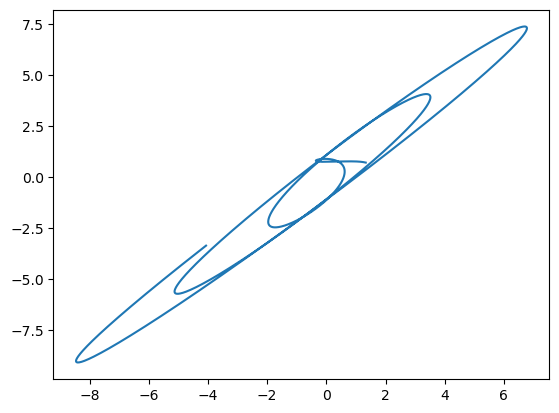

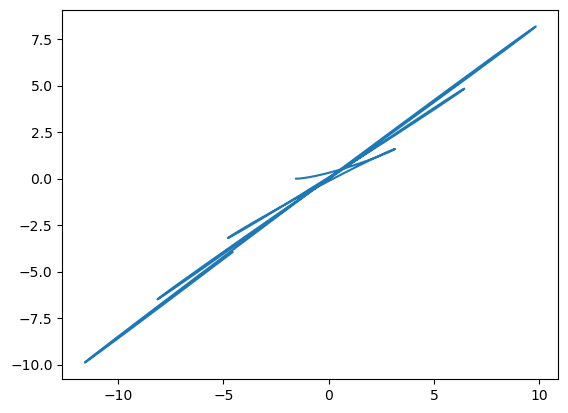

In [34]:
trajectory = [trajectory_data]
for i in range(1999):
  trajectory.append(Integrator(trajectory[-1],i))

plt.plot([trajectory[i][0] for i in range(2000)], [trajectory[i][1] for i in range(2000)])
plt.show()

plt.plot([trajectory[i][2] for i in range(2000)], [trajectory[i][3] for i in range(2000)])
plt.show()

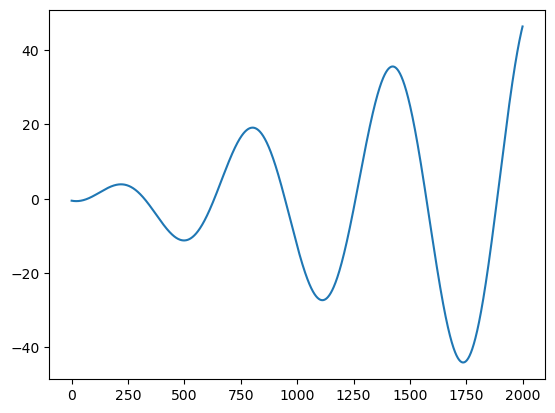

In [35]:
output = [(B.T)@Q@item for item in trajectory]

plt.plot(output)



(222.02364424683785, 3391.6642657146767)

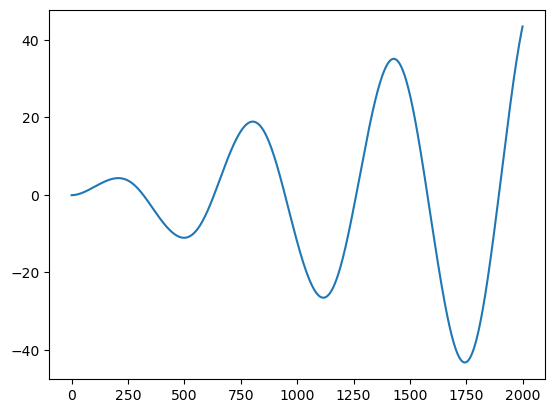

In [36]:
prediction = []

fake_data = torch.FloatTensor(2000,10)
fake_data[0]=x
for i in range(1,2000):
  temp = fake_data[i-1].clone()
  fake_data[i]=Integrator2(temp,i-1)
result = fake_data[:,9]

prediction = result.detach().numpy()

plt.plot(prediction)

train_error = np.sum(np.square(prediction[:1000]-np.array(output)[:1000]))
test_error = np.sum(np.square(prediction[1000:]-np.array(output)[1000:]))

train_error, test_error

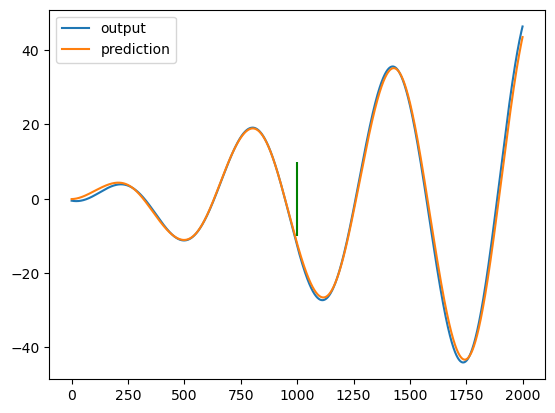

In [37]:
plt.figure()
plt.plot(output, label = 'output')
plt.plot(prediction, label = 'prediction')
plt.vlines(color="green",ymin=-10,ymax=10,x=1000)
plt.legend()

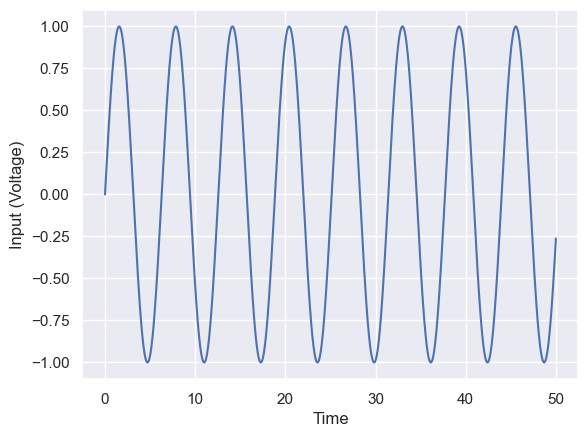

In [162]:
time = np.linspace(0,50,5000)
F = 1*np.sin(time)
plt.plot(time,F)
plt.xlabel("Time")
plt.ylabel("Input (Voltage)")
plt.savefig("Visualization for paper/signal_1.pdf", bbox_inches='tight')

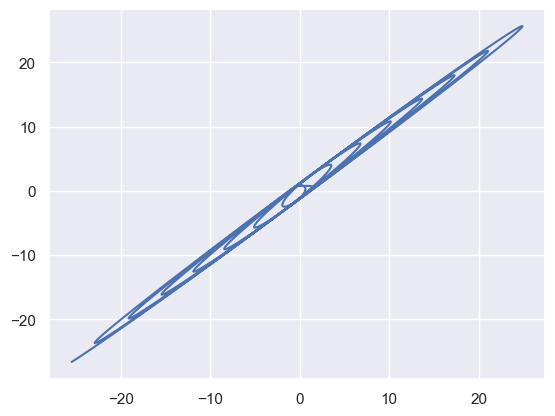

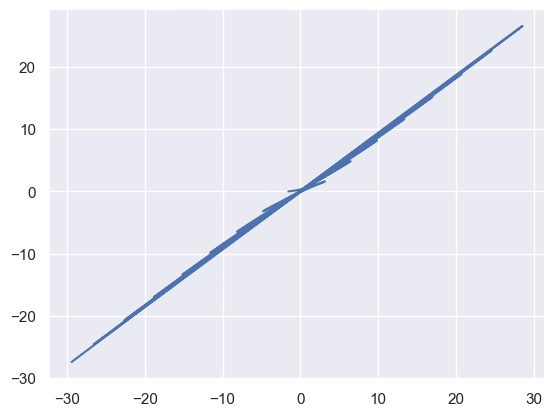

In [163]:
trajectory = [trajectory_data]
for i in range(4999):
  trajectory.append(Integrator(trajectory[-1],i))

plt.plot([trajectory[i][0] for i in range(5000)], [trajectory[i][1] for i in range(5000)])
plt.show()

plt.plot([trajectory[i][2] for i in range(5000)], [trajectory[i][3] for i in range(5000)])
plt.show()

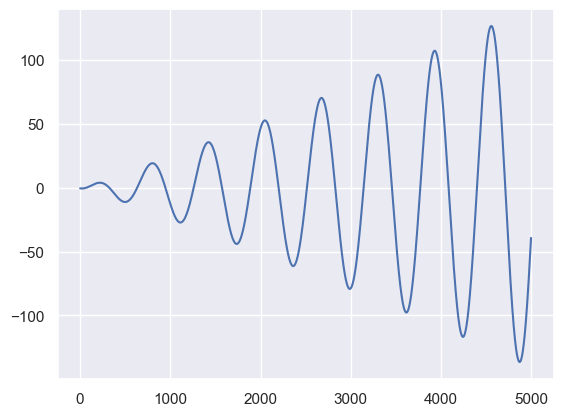

In [164]:
output = [(B.T)@Q@item for item in trajectory]

plt.plot(output)



(222.0666759140454, 558672.8855497752)

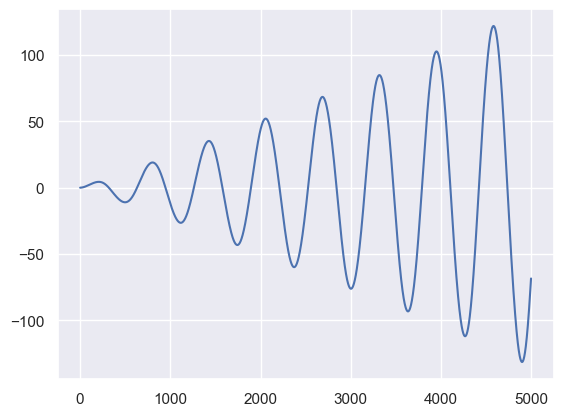

In [165]:
prediction = []

fake_data = torch.FloatTensor(5000,10)
fake_data[0]=x
for i in range(1,5000):
  temp = fake_data[i-1].clone()
  fake_data[i]=Integrator2(temp,i-1)
result = fake_data[:,9]

prediction = result.detach().numpy()

plt.plot(prediction)

train_error = np.sum(np.square(prediction[:1000]-np.array(output)[:1000]))
test_error = np.sum(np.square(prediction[1000:]-np.array(output)[1000:]))

train_error, test_error

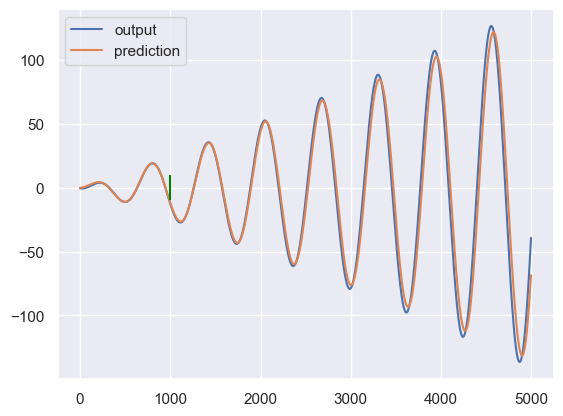

In [166]:
plt.figure()
plt.plot(output, label = 'output')
plt.plot(prediction, label = 'prediction')
plt.vlines(color="green",ymin=-10,ymax=10,x=1000)
plt.legend()

In [167]:
len(prediction)

5000

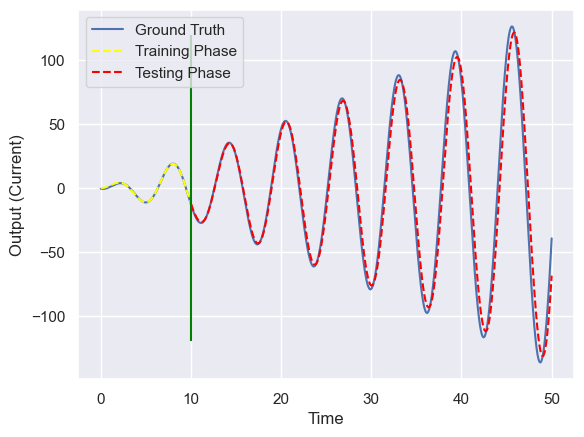

In [169]:
plt.figure()
plt.plot(np.linspace(0,50,5000),output, label = 'Ground Truth')
plt.plot(np.linspace(0,50,5000)[:1000],prediction[:1000], label = 'Training Phase', linestyle="dashed", color = "yellow")
plt.plot(np.linspace(0,50,5000)[1000:5000],prediction[1000:5000], label = 'Testing Phase', linestyle="dashed", color="red")
plt.vlines(color="green",ymin=-120,ymax=120,x=10)
plt.xlabel("Time")
plt.ylabel("Output (Current)")
plt.legend()
plt.savefig("Visualization for paper/test_signal_1.pdf", bbox_inches='tight')

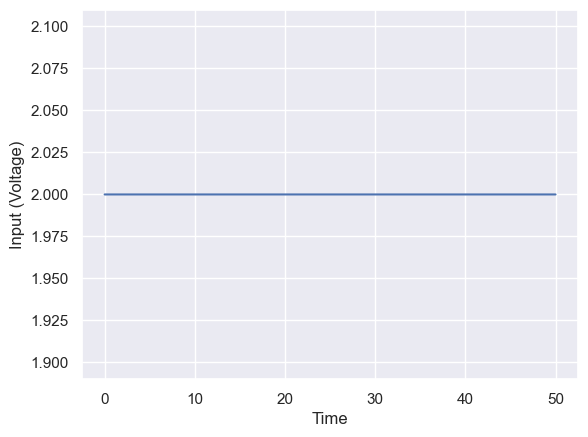

In [170]:
time = np.linspace(0,50,5000)
F = np.array([2]*5000)
plt.plot(time,F)
plt.xlabel("Time")
plt.ylabel("Input (Voltage)")
plt.savefig("Visualization for paper/signal_2.pdf", bbox_inches='tight')

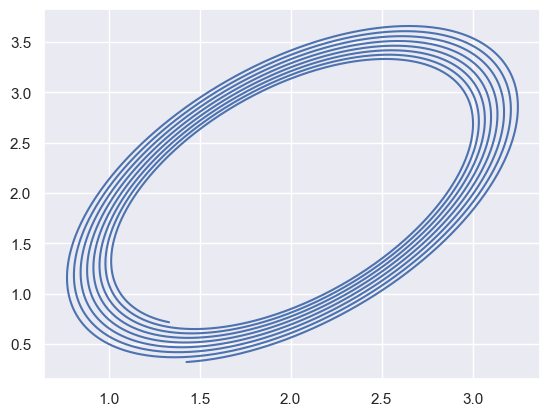

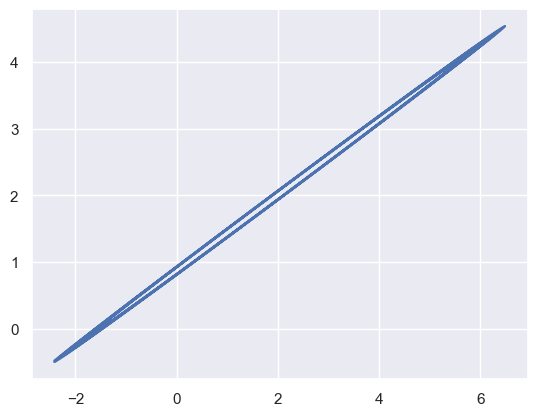

In [171]:
trajectory = [trajectory_data]
for i in range(4999):
  trajectory.append(Integrator(trajectory[-1],i))

plt.plot([trajectory[i][0] for i in range(5000)], [trajectory[i][1] for i in range(5000)])
plt.show()

plt.plot([trajectory[i][2] for i in range(5000)], [trajectory[i][3] for i in range(5000)])
plt.show()

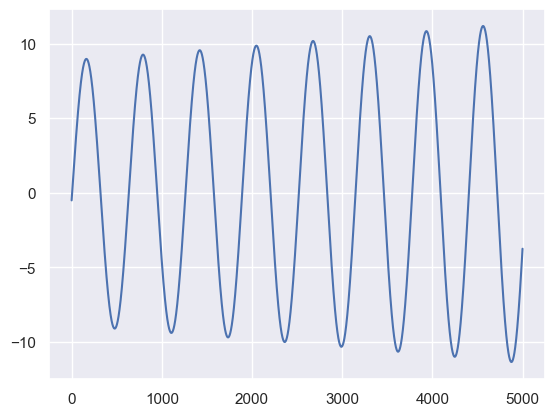

In [172]:
output = [(B.T)@Q@item for item in trajectory]

plt.plot(output)



(141.91493321605356, 16042.911551912364)

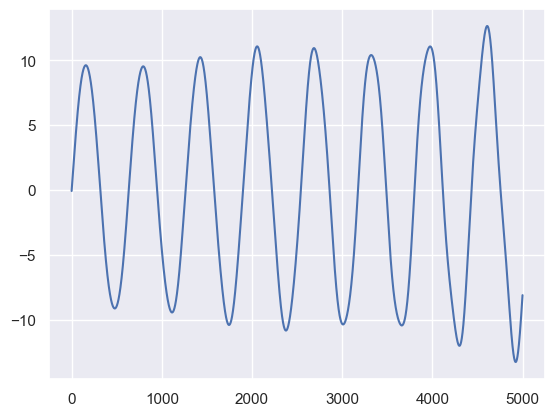

In [173]:
prediction = []

fake_data = torch.FloatTensor(5000,10)
fake_data[0]=x
for i in range(1,5000):
  temp = fake_data[i-1].clone()
  fake_data[i]=Integrator2(temp,i-1)
result = fake_data[:,9]

prediction = result.detach().numpy()

plt.plot(prediction)

train_error = np.sum(np.square(prediction[:1000]-np.array(output)[:1000]))
test_error = np.sum(np.square(prediction[1000:]-np.array(output)[1000:]))

train_error, test_error

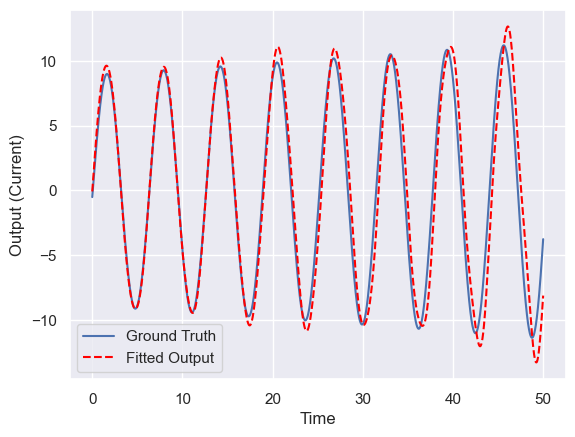

In [174]:
plt.figure()
plt.plot(np.linspace(0,50,5000),output, label = 'Ground Truth')
plt.plot(np.linspace(0,50,5000),prediction, label = 'Fitted Output', linestyle="dashed", color="red")
plt.xlabel("Time")
plt.ylabel("Output (Current)")
plt.legend()
plt.savefig("Visualization for paper/test_signal_2.pdf", bbox_inches='tight')

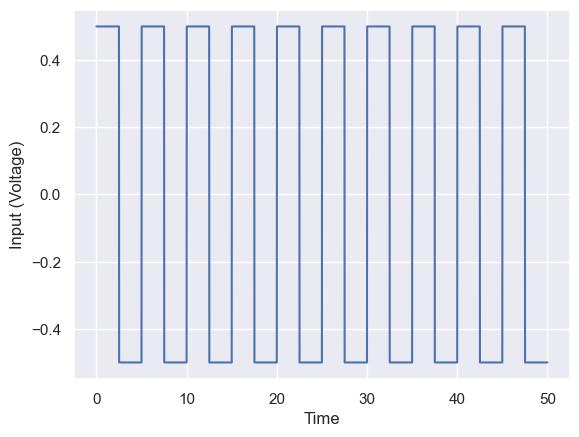

In [175]:
time = np.linspace(0, 50, 5000)
F = 0.5*signal.square(2 * np.pi * 1000 * time)
plt.plot(time, F)
plt.xlabel("Time")
plt.ylabel("Input (Voltage)")
plt.savefig("Visualization for paper/signal_3.pdf", bbox_inches='tight')

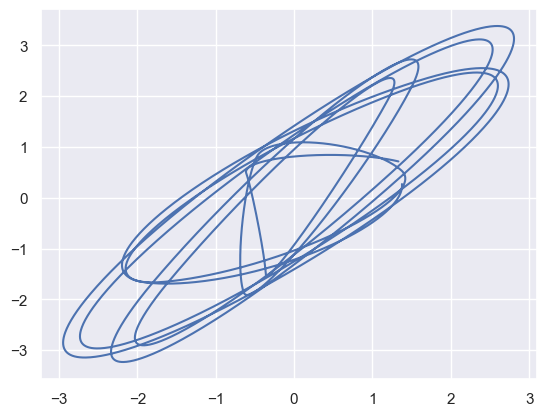

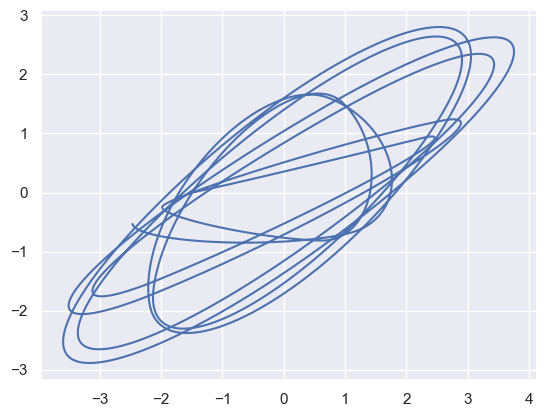

In [176]:
trajectory = [trajectory_data]
for i in range(4999):
  trajectory.append(Integrator(trajectory[-1],i))

plt.plot([trajectory[i][0] for i in range(5000)], [trajectory[i][1] for i in range(5000)])
plt.show()

plt.plot([trajectory[i][2] for i in range(5000)], [trajectory[i][3] for i in range(5000)])
plt.show()

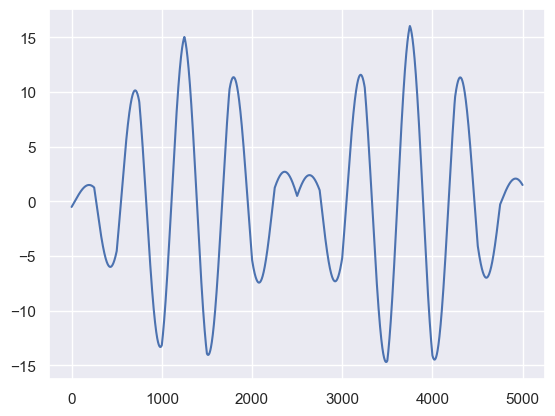

In [177]:
output = [(B.T)@Q@item for item in trajectory]

plt.plot(output)

(353.7220791824028, 32172.290954180266)

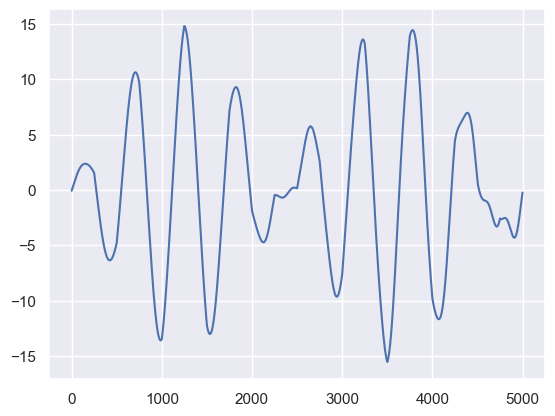

In [178]:
prediction = []

fake_data = torch.FloatTensor(5000,10)
fake_data[0]=x
for i in range(1,5000):
  temp = fake_data[i-1].clone()
  fake_data[i]=Integrator2(temp,i-1)
result = fake_data[:,9]

prediction = result.detach().numpy()

plt.plot(prediction)

train_error = np.sum(np.square(prediction[:1000]-np.array(output)[:1000]))
test_error = np.sum(np.square(prediction[1000:]-np.array(output)[1000:]))

train_error, test_error

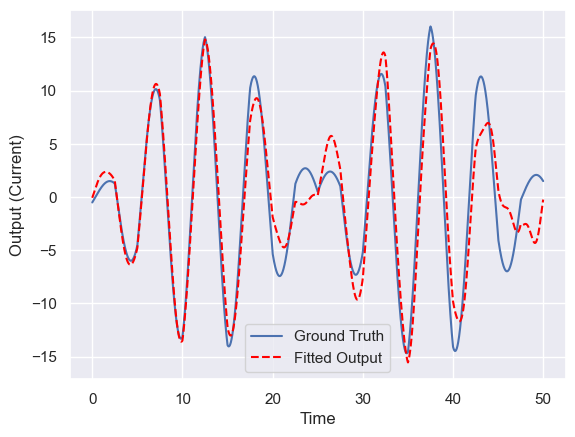

In [179]:
plt.figure()
plt.plot(np.linspace(0,50,5000),output, label = 'Ground Truth')
plt.plot(np.linspace(0,50,5000),prediction, label = 'Fitted Output', linestyle="dashed", color="red")
plt.xlabel("Time")
plt.ylabel("Output (Current)")
plt.legend()
plt.savefig("Visualization for paper/test_signal_3.pdf", bbox_inches='tight')

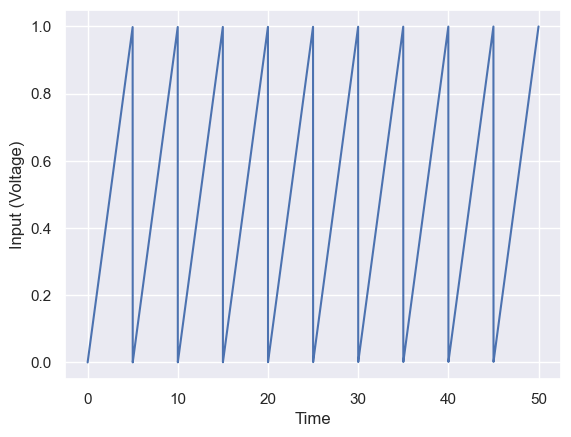

In [180]:
time = np.linspace(0, 50, 5000)
F = 0.5*(signal.sawtooth(2 * np.pi * 1000 * time) + 1)
plt.plot(time, F)
plt.xlabel("Time")
plt.ylabel("Input (Voltage)")
plt.savefig("Visualization for paper/signal_4.pdf", bbox_inches='tight')

In [181]:
len(time)

5000

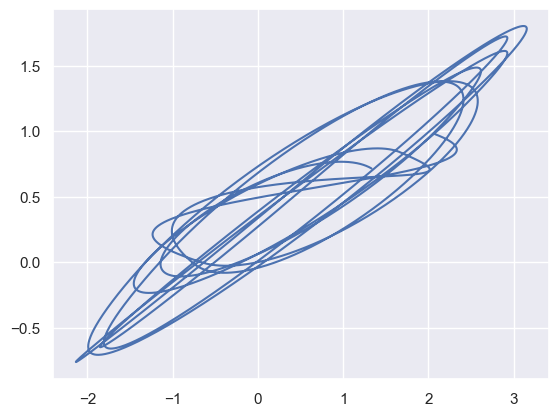

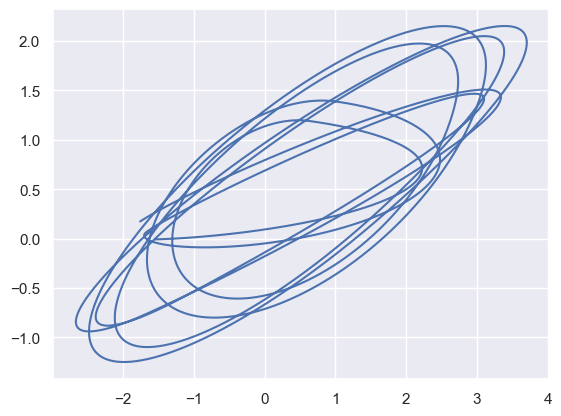

In [182]:
trajectory = [trajectory_data]
for i in range(4999):
  trajectory.append(Integrator(trajectory[-1],i))

plt.plot([trajectory[i][0] for i in range(5000)], [trajectory[i][1] for i in range(5000)])
plt.show()

plt.plot([trajectory[i][2] for i in range(5000)], [trajectory[i][3] for i in range(5000)])
plt.show()

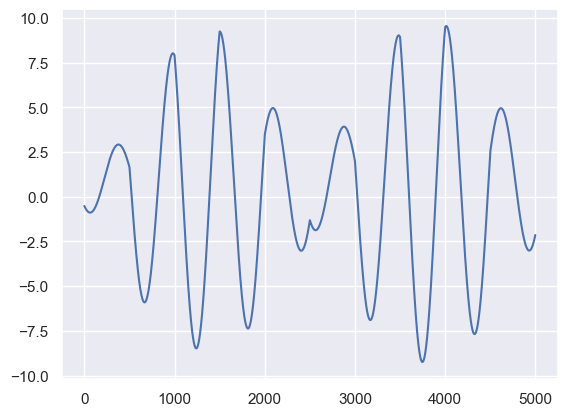

In [183]:
output = [(B.T)@Q@item for item in trajectory]
plt.plot(output)

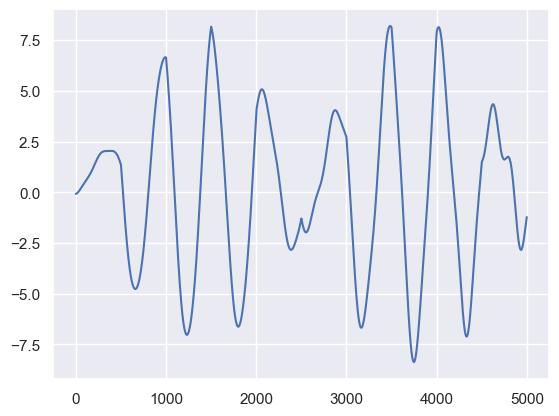

In [184]:
prediction = []
fake_data = torch.FloatTensor(5000,10)
fake_data[0]=x
for i in range(1,5000):
  temp = fake_data[i-1].clone()
  fake_data[i]=Integrator2(temp,i-1)
result = fake_data[:,9]
prediction = result.detach().numpy()
plt.plot(prediction)
train_error = np.sum(np.square(prediction[:1000]-np.array(output)[:1000]))
test_error = np.sum(np.square(prediction[1000:]-np.array(output)[1000:]))

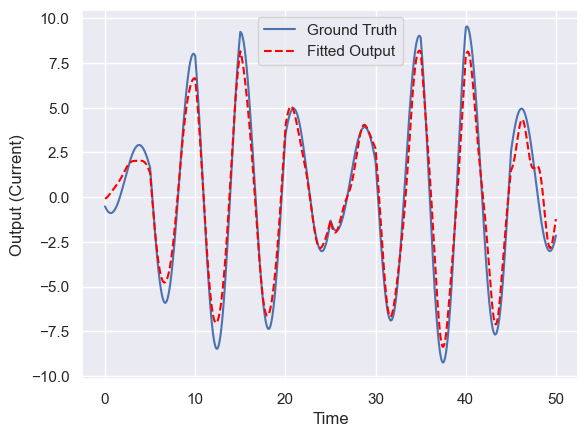

In [185]:
plt.figure()
plt.plot(np.linspace(0,50,5000),output, label = 'Ground Truth')
plt.plot(np.linspace(0,50,5000),prediction, label = 'Fitted Output', linestyle="dashed", color="red")
plt.xlabel("Time")
plt.ylabel("Output (Current)")
plt.legend()
plt.savefig("Visualization for paper/test_signal_4.pdf", bbox_inches='tight')